In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
laptops=pd.read_csv(r'C:\Users\VARUN MISHRA\OneDrive\Desktop\laptop\laptop_price.csv', encoding = 'latin')
laptops = laptops.set_index('laptop_ID')
laptops.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [3]:
laptops.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), object(9)
memory usage: 132.3+ KB


In [4]:
laptops.describe()

,Inches,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,15.017191,2.038734,1123.686992
std,1.426304,0.665475,699.009043
min,10.100000,0.690000,174.000000
25%,14.000000,1.500000,599.000000
50%,15.600000,2.040000,977.000000
75%,15.600000,2.300000,1487.880000
max,18.400000,4.700000,6099.000000


C:\Users\VARUN MISHRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inches'>

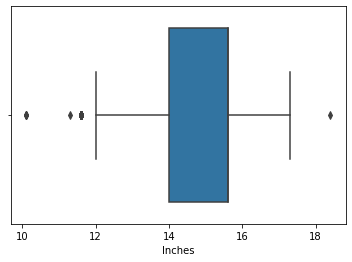

In [5]:
sns.boxplot(laptops.Inches)


<AxesSubplot:>

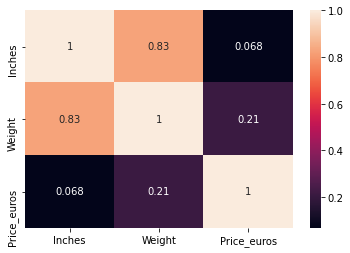

In [6]:
sns.heatmap(laptops.corr(),annot=True)

C:\Users\VARUN MISHRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inches', ylabel='Weight'>

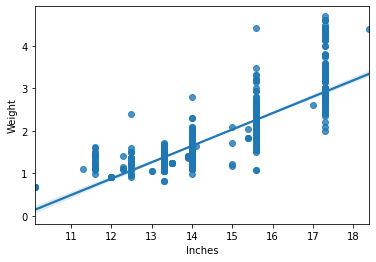

In [7]:
sns.regplot(laptops['Inches'],laptops['Weight'])


In [8]:
laptops.isnull().sum()


Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
laptops.shape

(1303, 12)

In [10]:
laptops.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price_euros'],
      dtype='object')

In [11]:
laptops.nunique()

Company              19
Product             618
TypeName              6
Inches               18
ScreenResolution     40
Cpu                 118
Ram                   9
Memory               39
Gpu                 110
OpSys                 9
Weight              171
Price_euros         791
dtype: int64

In [12]:
def check():
    for i in range(len(laptops.columns)):
        if laptops[laptops.columns[i]].dtype=='O':
            print(laptops.columns[i], "is String type.")
        else:
            print(laptops.columns[i],"is",laptops[laptops.columns[i]].dtype, "type.")
check()

Company is String type.
Product is String type.
TypeName is String type.
Inches is float64 type.
ScreenResolution is String type.
Cpu is String type.
Ram is String type.
Memory is String type.
Gpu is String type.
OpSys is String type.
Weight is float64 type.
Price_euros is float64 type.


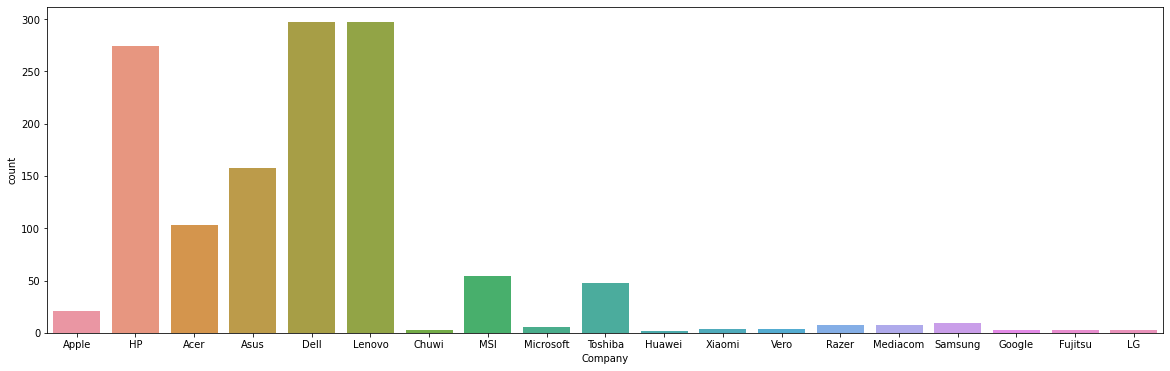

In [13]:
laptops['Company'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Company", data=laptops, ax=ax)
plt.show()

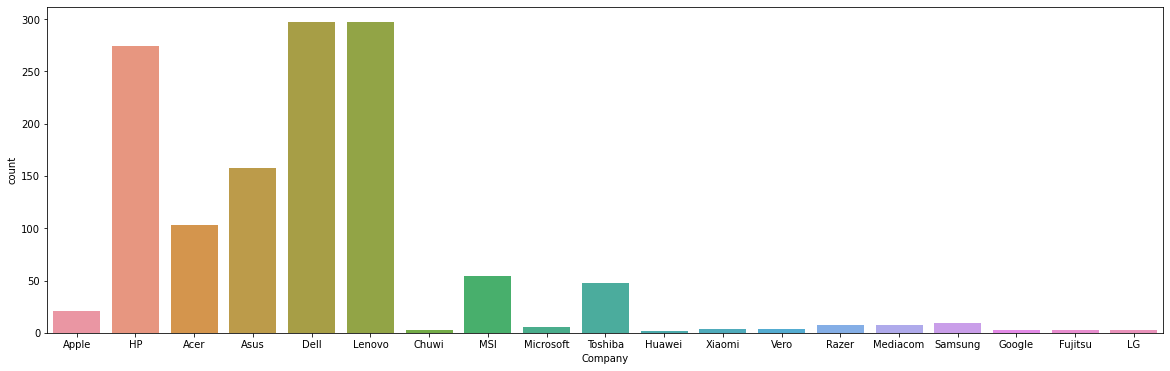

In [14]:
laptops['Company'].value_counts()
fig_dims = (20, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="Company", data=laptops, ax=ax)
plt.show()

In [15]:
laptops["Ram"] = laptops["Ram"].str.replace('GB', '')
laptops['Memory'] = laptops['Memory'].astype(str).replace('\.0', '', regex=True)
laptops["Memory"] = laptops["Memory"].str.replace('GB', '')
laptops["Memory"] = laptops["Memory"].str.replace('TB', '000')
new2 = laptops["Memory"].str.split("+", n = 1, expand = True)
laptops["first"]= new2[0]
laptops["first"]=laptops["first"].str.strip()
laptops["second"]= new2[1]
laptops["Layer1HDD"] = laptops["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptops["Layer1SSD"] = laptops["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptops["Layer1Hybrid"] = laptops["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops["Layer1Flash_Storage"] = laptops["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptops['first'] = laptops['first'].str.replace(r'\D', '')
laptops["second"].fillna("0", inplace = True)
laptops["Layer2HDD"] = laptops["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptops["Layer2SSD"] = laptops["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptops["Layer2Hybrid"] = laptops["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops["Layer2Flash_Storage"] = laptops["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
laptops['second'] = laptops['second'].str.replace(r'\D', '')
laptops["first"] = laptops["first"].astype(int)
laptops["second"] = laptops["second"].astype(int)
laptops["Total_Memory"]=(laptops["first"]*(laptops["Layer1HDD"]+laptops["Layer1SSD"]+laptops["Layer1Hybrid"]+laptops["Layer1Flash_Storage"])+laptops["second"]*(laptops["Layer2HDD"]+laptops["Layer2SSD"]+laptops["Layer2Hybrid"]+laptops["Layer2Flash_Storage"]))
laptops["Memory"]=laptops["Total_Memory"]
laptops["HDD"]=(laptops["first"]*laptops["Layer1HDD"]+laptops["second"]*laptops["Layer2HDD"])
laptops["SSD"]=(laptops["first"]*laptops["Layer1SSD"]+laptops["second"]*laptops["Layer2SSD"])
laptops["Hybrid"]=(laptops["first"]*laptops["Layer1Hybrid"]+laptops["second"]*laptops["Layer2Hybrid"])
laptops["Flash_Storage"]=(laptops["first"]*laptops["Layer1Flash_Storage"]+laptops["second"]*laptops["Layer2Flash_Storage"])
new = laptops["ScreenResolution"].str.split("x", n = 1, expand = True) 
laptops["X_res"]= new[0]
laptops["Y_res"]= new[1]
laptops["Y_res"]= pd.to_numeric(laptops["Y_res"])
laptops["Y_res"]= laptops["Y_res"].astype(float)
laptops["X_res"]=(laptops['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
laptops["X_res"]=pd.to_numeric(laptops["X_res"])
laptops["PPI"]=(((laptops["X_res"]**2+laptops["Y_res"]**2)**(1/2))/laptops["Inches"]).astype(float)
laptops["ScreenResolution"]=(laptops["X_res"]*laptops["Y_res"]).astype(float)
laptops["Ram"] = laptops["Ram"].astype(int)
laptops["Weight"] = laptops["Weight"].astype(float)
laptops=laptops.drop(['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)

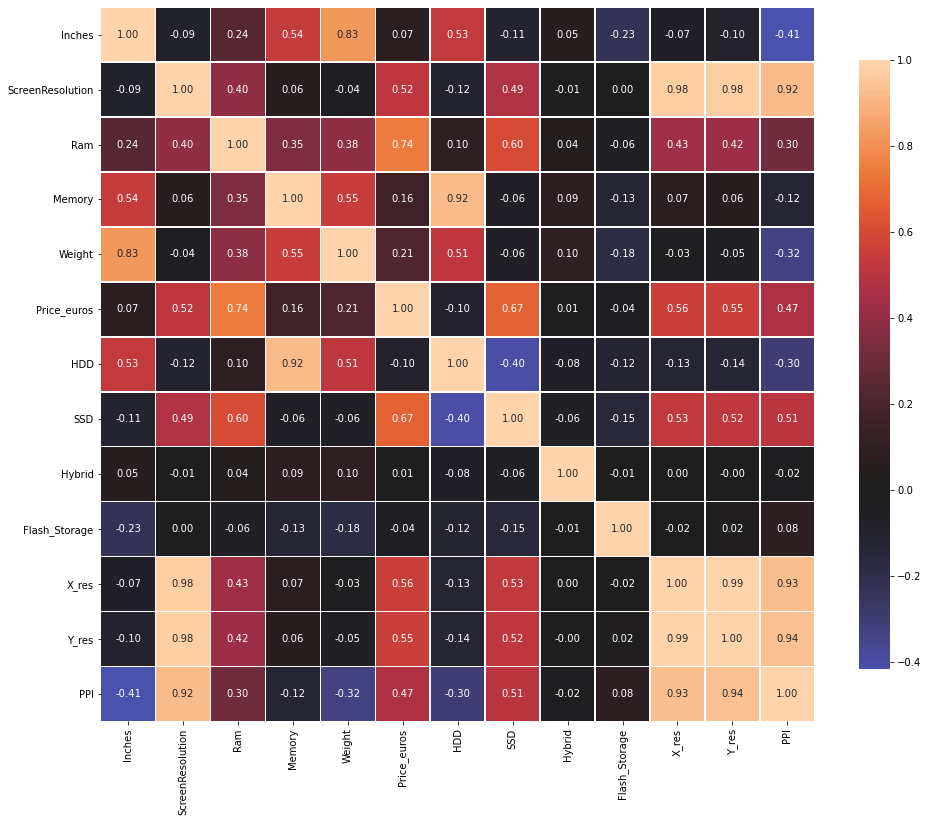

In [16]:
def correlation_heatmap(train):
    correlations = train.corr()
    
    fig, ax = plt.subplots(figsize=(16,16))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(laptops)

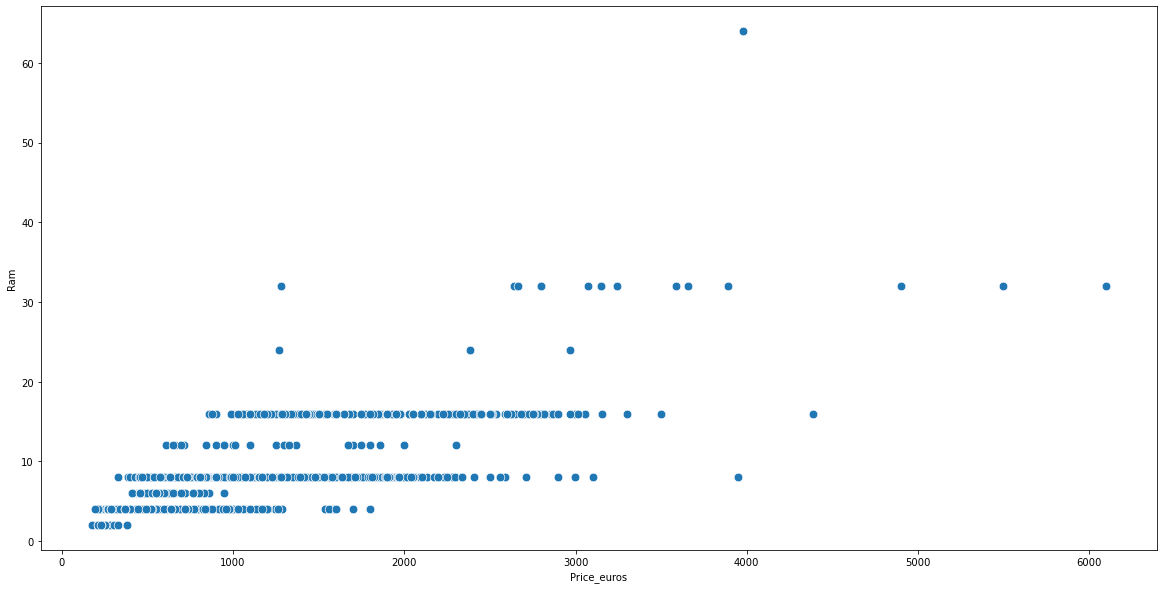

In [17]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=laptops, x="Price_euros", y="Ram", ax=ax, s=75)
plt.show()

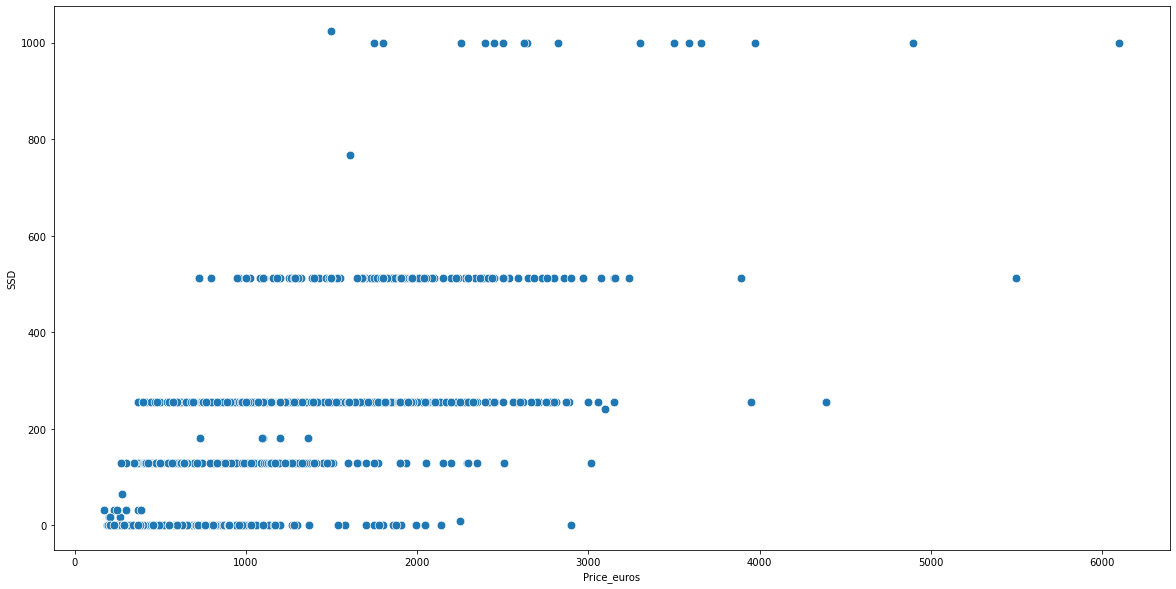

In [18]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=laptops, x="Price_euros", y="SSD", ax=ax, s=75)
plt.show()


In [19]:
X = laptops.drop(['Price_euros'],axis=1)
Y = laptops['Price_euros'].values
X = X.select_dtypes(exclude=['object'])


In [20]:
X


,Inches,ScreenResolution,Ram,Memory,Weight,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
laptop_ID,,,,,,,,,,,,
1,13.3,4096000.0,8,128,1.37,0,128,0,0,2560.0,1600.0,226.983005
2,13.3,1296000.0,8,128,1.34,0,0,0,128,1440.0,900.0,127.677940
3,15.6,2073600.0,8,256,1.86,0,256,0,0,1920.0,1080.0,141.211998
4,15.4,5184000.0,16,512,1.83,0,512,0,0,2880.0,1800.0,220.534624
5,13.3,4096000.0,8,256,1.37,0,256,0,0,2560.0,1600.0,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
1316,14.0,2073600.0,4,128,1.80,0,128,0,0,1920.0,1080.0,157.350512
1317,13.3,5760000.0,16,512,1.30,0,512,0,0,3200.0,1800.0,276.053530
1318,14.0,1049088.0,2,64,1.50,0,0,0,64,1366.0,768.0,111.935204


In [21]:
Y

array([1339.69,  898.94,  575.  , ...,  229.  ,  764.  ,  369.  ])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [23]:
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = reg.predict(X_test)

In [25]:
A=r2_score(y_test, y_pred)
A*100

68.5779609934042

In [26]:
res = reg.predict([[13.3,4096000.0,8,128,1.37,0,128,0,0,2560.0,1600.0,226.983005]])

In [27]:
res


array([1365.57113539])

In [33]:
import pickle
with open('lap.pkl', 'wb') as f:
    pickle.dump(reg, f)

['laptops.pkl']